In [83]:
import numpy as np
import pandas as pd
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [84]:
def read_stock_data(tickers, start, end):
    data = dict()
    for ticker in tickers:
        stock = yf.download(ticker, start=start, end=end, progress=False)
        data[ticker] = stock['Open']
    data = pd.DataFrame.from_dict(data)
    data = data.dropna(axis=1)
    return data


def build_stock_network(matrix, threshold):
    G = nx.Graph()
    edgelist = []
    for u in range(len(matrix)):
        for v in range(len(matrix)):
            if u != v:
                value = matrix[u, v]
                if abs(value) > threshold:
                    G.add_edge(u, v)                  
    return G

In [176]:
tickers = pd.read_excel('stock-symbols.xlsx', header=None)[0]
data = read_stock_data(tickers, '2020-01-01', '2024-01-01')

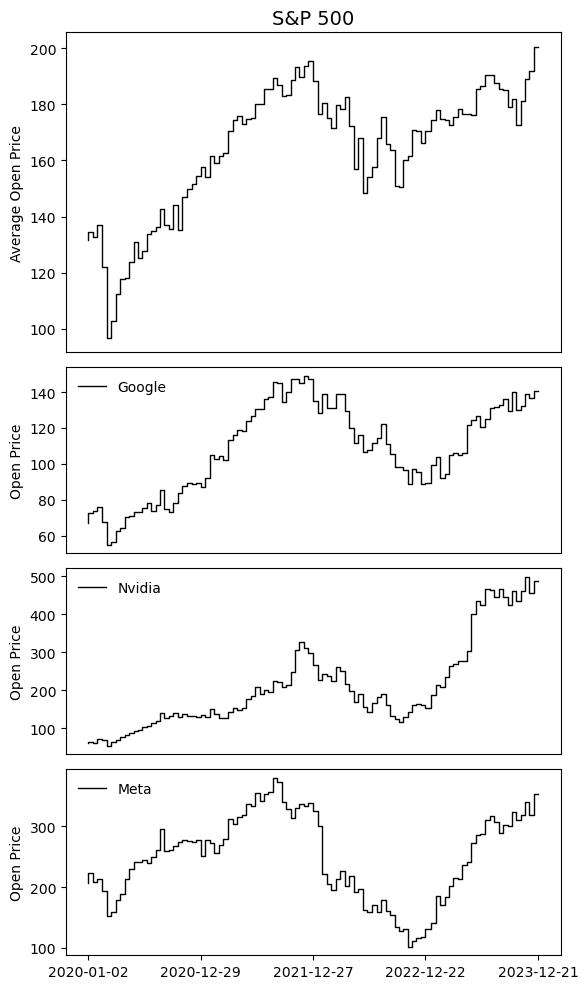

In [81]:
# Create a figure with a specified size
fig = plt.figure(figsize=(6, 10))  # Total height based on the specified plot sizes

# Define the grid layout
gs = fig.add_gridspec(14, 1)  # 13 rows in total

# First subplot (occupies 4 rows out of 13)
ax1 = fig.add_subplot(gs[0:5, 0])
ax1.plot(list(mean_values.index)[::10], list(mean_values)[::10], color='k', lw=1, drawstyle='steps')
ax1.set_title('S&P 500', size=14)
ax1.set_ylabel('Average Open Price')
ax1.set_xticks([])

# Second subplot (occupies 2.5 rows out of 13)
ax2 = fig.add_subplot(gs[5:8, 0])
ax2.plot(list(data['GOOG'].index)[::10], list(data['GOOG'])[::10], color='k', lw=1, drawstyle='steps', label='Google')
ax2.legend(frameon=False)
ax2.set_ylabel('Open Price')
ax2.set_xticks([])

# Third subplot (occupies 2.5 rows out of 13)
ax3 = fig.add_subplot(gs[8:11, 0])w
ax3.plot(list(data['NVDA'].index)[::10], list(data['NVDA'])[::10], color='k', lw=1, drawstyle='steps', label='Nvidia')
ax3.legend(frameon=False)
ax3.set_ylabel('Open Price')
ax3.set_xticks([])

# Fourth subplot (occupies 2.5 rows out of 13)
ax4 = fig.add_subplot(gs[11:14, 0])
ax4.plot(list(data['META'].index)[::10], list(data['META'])[::10], color='k', lw=1, drawstyle='steps', label='Meta')
ax4.legend(frameon=False)
ax4.set_ylabel('Open Price')
ax4.set_xticks([mean_values.index[i] for i in range(0, len(mean_values), 250)])

# Adjust layout to make room for titles
plt.tight_layout()
plt.savefig('stocks-overview.png', dpi=300)

{0: 'SNPS', 1: 'XOM', 2: 'CVX', 3: 'COP', 4: 'OXY', 5: 'HES', 6: 'MRO', 7: 'EOG', 8: 'APA', 9: 'ETN', 10: 'KLAC', 11: 'IR', 12: 'FANG', 13: 'TRGP', 14: 'MMC', 15: 'AJG', 16: 'HAL', 17: 'PWR'}
490
70


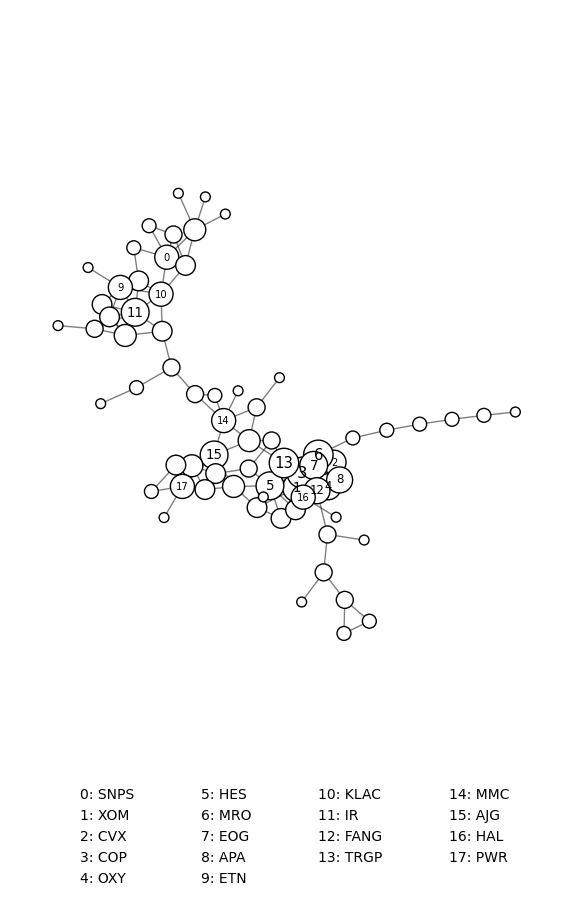

In [189]:
matrix = data.corr()
G = build_stock_network(matrix.to_numpy(), 0.955)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
Gc = G.subgraph(Gcc[0])

pos = nx.kamada_kawai_layout(Gc)
labels = {n: matrix.index[n] for n in Gc.nodes if Gc.degree(n) > 5}
labels_int = {n: i for i, n in enumerate(labels.keys())}
labels_name = {i: matrix.index[n] for i, n in enumerate(labels.keys())}
print(labels_name)

plt.figure(figsize=(6, 9))
nx.draw_networkx_nodes(Gc, pos, node_size=[Gc.degree(n)*50 for n in Gc.nodes], node_color='white', edgecolors='k', linewidths=1)
nx.draw_networkx_edges(Gc, pos, width=1, edge_color='k', alpha=0.5)

for node, label in labels_int.items():
    nx.draw_networkx_labels(Gc, pos, {node: label}, font_size=Gc.degree(node)*1.2)
    
plt.axis('equal')
plt.axis('off')

lines = [Line2D([0], [0], color='white') for _ in labels_name]
names = [str(key) + ': ' + str(val) for key, val in labels_name.items()]
plt.legend(lines, names, frameon=False, ncol=4, loc='lower center', bbox_to_anchor=[0.48, -0.1],  fontsize='10')

print(len(matrix))
print(len(Gc))
plt.tight_layout()
plt.savefig('stocks-network.png', dpi=300)

{0: 'SNPS', 1: 'XOM', 2: 'CVX', 3: 'COP', 4: 'OXY', 5: 'HES', 6: 'MRO', 7: 'EOG', 8: 'APA', 9: 'ETN', 10: 'KLAC', 11: 'IR', 12: 'FANG', 13: 'TRGP', 14: 'MMC', 15: 'AJG', 16: 'HAL', 17: 'PWR'}
490
70


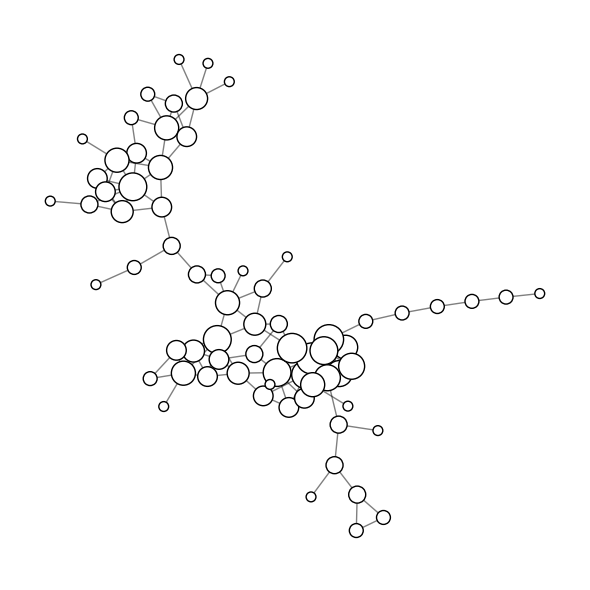

In [188]:
matrix = data.corr()
G = build_stock_network(matrix.to_numpy(), 0.955)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
Gc = G.subgraph(Gcc[0])

pos = nx.kamada_kawai_layout(Gc)
labels = {n: matrix.index[n] for n in Gc.nodes if Gc.degree(n) > 5}
labels_int = {n: i for i, n in enumerate(labels.keys())}
labels_name = {i: matrix.index[n] for i, n in enumerate(labels.keys())}
print(labels_name)

plt.figure(figsize=(6, 6))
nx.draw_networkx_nodes(Gc, pos, node_size=[Gc.degree(n)*50 for n in Gc.nodes], node_color='white', edgecolors='k', linewidths=1)
nx.draw_networkx_edges(Gc, pos, width=1, edge_color='k', alpha=0.5)
    
plt.axis('equal')
plt.axis('off')

print(len(matrix))
print(len(Gc))
plt.tight_layout()
plt.savefig('stocks-preview.png', dpi=300)